In [1]:
import sys

if sys.version_info.minor >= 8:
    print("You are using Python 3.8 or higher, so you don't need to install TensorFlow CPU.")
else:
    !pip install tensorflow==2.12.0

if 'tensorflow-gpu' in sys.modules:
    print("You already have TensorFlow GPU installed.")
else:
    !pip install tensorflow-gpu==2.12.0

!pip install opencv-python matplotlib


You are using Python 3.8 or higher, so you don't need to install TensorFlow CPU.
Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-5hpz_z4v/tensorflow-gpu_69bb9f58aa314891940760fe83532374/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.

In [2]:
#import important dependencis 
import cv2 
import os 
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-5319sleu/tensorflow-gpu_f4f56c4cb2fc46e29e0e6fbc144dc617/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This er

In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import tensorflow as tf; print(tf.test.is_gpu_available())

2023-07-14 20:34:04.698175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 20:34:05.574978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


2023-07-14 20:34:07.251520: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
import tensorflow as tf

def detect_gpu():
  """Returns True if TensorFlow is able to detect a GPU, False otherwise."""

  try:
    tf.config.list_physical_devices('GPU')
    return True
  except:
    return False

if __name__ == '__main__':
  print(detect_gpu())

True


In [7]:
#import important tensorflow dependencis 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Input,Conv2D,Dense,Flatten,MaxPooling2D
import tensorflow as tf

In [8]:
#create a folder structure
pos = os.path.join('data','positive')
neg = os.path.join('data','negative')
anch = os.path.join('data','anchor')

In [9]:
# #make the directory
os.makedirs(pos)
os.makedirs(neg)
os.makedirs(anch)

FileExistsError: [Errno 17] File exists: 'data/positive'

In [10]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

In [11]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw',directory)):
        ex_path = os.path.join('lfw',directory,file)
        new_path= os.path.join(neg,file)
        os.replace(ex_path,new_path)
        

# **collect positive and anchor classes**

In [12]:
# Import uuid library to generate unique image names
import uuid

In [13]:
os.path.join(anch,'{}.jpg'.format(uuid.uuid1()))

'data/anchor/bf9541dc-2257-11ee-85ef-617b6042c71f.jpg'

In [14]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    # Cut down frame to 250x250px
    frame = frame[120:120+250, 200:200+250, :]
    
    # Collect anchors
    if cv2.waitKey(1) & 0xFF == ord('a'):
        # Create the unique file path
        imgname = os.path.join(anch, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0xFF == ord('p'):
        # Create the unique file path
        imgname = os.path.join(pos, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
cap.release()

# Close the image show frame
cv2.destroyAllWindows()

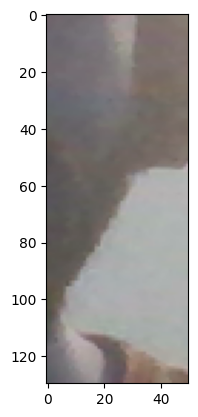

In [15]:
plt.imshow(frame[120:120+250,200:200+250, :])

# NEW - Data Augmentation

In [16]:
def data_aug(img):
    data =[]
    for i in range(9):
        img= tf.image.stateless_random_brightness(img,max_delta =0.02 ,seed =(1,2))
        img= tf.image.stateless_random_contrast(img,lower =0.6,upper =1,seed =(1,3))
        #img = tf.image.stateless_random_crop(img,size=(20,20,3), seed =(1,2))
        img= tf.image.stateless_random_flip_left_right(img,seed =(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img,lower =0.09,upper=1,seed=(np.random.randint(100),np.random.randint(100)))
        
        data.append(img)
    return data

In [17]:
import os 
import uuid

In [19]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [21]:
import tensorflow as tf

In [23]:
img_path = os.path.join(anch,'4dc35c83-21fd-11ee-88e2-895a91a8a222.jpg')
img =cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(anch,'{}.jpg'.format(uuid.uuid1())),image.numpy())

In [24]:
for file_name in os.listdir(os.path.join(pos)):
    img_path =os.path.join(pos,file_name)
    img=cv2.imread(img_path)
    augmented_images = data_aug(img)
    
    for images in augmented_images:
        cv2.imwrite(os.path.join(pos,'{}.jpg'.format(uuid.uuid1())),images.numpy())
        

# Load and Preprocess Images

#  Get images Directories

In [73]:
positive = tf.data.Dataset.list_files(os.path.join(pos, '*.jpg')).take(300)
negative = tf.data.Dataset.list_files(os.path.join(neg, '*.jpg')).take(300)
anchor = tf.data.Dataset.list_files(os.path.join(anch, '*.jpg')).take(300)

In [74]:
dir_test = anchor.as_numpy_iterator()

In [75]:
print(dir_test.next())

b'data/anchor/5fa513ad-21fd-11ee-88e2-895a91a8a222.jpg'


In [76]:
anch+'\*.jpg'

'data/anchor\\*.jpg'

## preprocessing -Scale and Resize

In [77]:
def preprocess(file_path):
    byte_img =tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img,(100,100))
    img = img/255.0
    return img

In [78]:
img = preprocess('data/anchor/4dc35c83-21fd-11ee-88e2-895a91a8a222.jpg')

In [79]:
img.numpy().max()

0.8752451

In [80]:
# dataset.map(preprocess)

# create labelled dataset

In [82]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))

data = positives.concatenate(negatives)

In [83]:
samples = data.as_numpy_iterator()

In [84]:
example =samples.next()

In [85]:
example

(b'data/anchor/4c9387e3-21fd-11ee-88e2-895a91a8a222.jpg',
 b'data/positive/8ba5289b-2258-11ee-85ef-617b6042c71f.jpg',
 1.0)

# Build Train and Testing partition

In [86]:
def preprocess_twin(input_img,validation_img,label):
    return (preprocess(input_img)),preprocess(validation_img),label

In [87]:
res = preprocess_twin(*example)

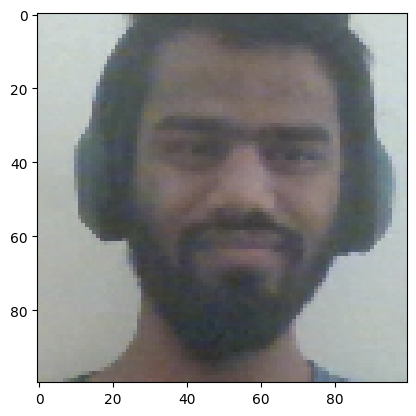

In [88]:
plt.imshow(res[0])

In [89]:
res[2]

1.0

In [90]:
#build dataloader pipline

data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [91]:
#training partition 
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [92]:
#testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data =test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering

## Build Embedding layers

In [93]:
inp = Input(shape=(100,100,3),name ='input_image')

In [94]:
c1 =Conv2D(64,(10,10), activation ='relu') (inp)

In [95]:
m1 =MaxPooling2D(64,(2,2), padding='same') (c1)

In [96]:
c2 = Conv2D(128,(7,7),padding ='same')(m1)
m2 = MaxPooling2D(64,(2,2),padding ='same')(c2)

In [97]:
c3 = Conv2D(128,(4,4),padding ='same')(m2)
m3 = MaxPooling2D(64,(2,2),padding ='same')(c3)

In [98]:
c4 = Conv2D(256,(4,4),padding ='same')(m3)
f1 = Flatten()(c4)
d1 =Dense(4096,activation='sigmoid')(f1)

In [99]:
mod = Model(inputs =[inp],outputs =[d1],name ='embedding')

In [100]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 46, 46, 128)       401536    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 23, 23, 128)       26

In [101]:
def make_embedding():
    inp = Input(shape =(100,100,3),name ='input_image')
    
    #first block
    c1 =Conv2D(64,(10,10), activation ='relu')(inp)
    m1 =MaxPooling2D(64,(2,2),padding ='same')(c1)
    
    #second block
    c2 = Conv2D(128,(7,7),activation ='relu') (m1)
    m2 =MaxPooling2D(64,(2,2),padding ='same') (c2)
    
    #third block
    c3 = Conv2D(128,(4,4), activation ='relu') (m2)
    m3 =MaxPooling2D(64,(2,2),padding ='same') (c3)
    
    #final block
    c4 = Conv2D(256,(4,4), activation ='relu') (m3)
    f1 = Flatten() (c4)
    d1= Dense(4096,activation ='sigmoid')(f1) 
    
    return Model(inputs =[inp],outputs =[d1], name ='embedding')

In [102]:
embedding = make_embedding()

In [103]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 20, 20, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 17, 17, 128)       26

# Build Distance Layer

In [104]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)
    

In [105]:
l1 = L1Dist()

# Make siamese Model 

In [107]:
input_image = Input(name ='input_img', shape =(100,100,3))
validation_image = Input(name ='validation_img' ,shape =(100,100,3))

In [108]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [109]:
siamese_layer = L1Dist()

In [110]:
distances = siamese_layer(inp_embedding, val_embedding)

In [111]:
classifier =Dense(1,activation ='sigmoid')(distances)

In [112]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_5')>

In [113]:
siamese_network = Model(inputs =[input_image,validation_image], outputs= classifier ,name ='SiameseNetwork')

In [114]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [115]:
def make_siamese_model():
    #anchor image input in network 
    input_image =Input(name ='input_img',shape =(100,100,3))
    
    #validation image in network
    validation_image =Input( name ='validation_img',shape =(100,100,3))
    
    #combine siamese distances components 
    siamese_layer =L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image),embedding(validation_image))
    
    #classifier layer
    classifier =Dense(1,activation ='sigmoid')(distances)
    return Model(inputs =[input_image,validation_image],outputs = classifier ,name ='SiameseNetwork')
    

In [116]:
siamese_model = make_siamese_model()

In [117]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Training 

## Setup Loss and optimizer

In [118]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [119]:
opt = tf.keras.optimizers.Adam(1e-4)

## Establish Checkpoints 

In [120]:
checkpoint_dir ='./training_checkpoints'
checkpoint_prefix =os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt =opt ,siamese_model = siamese_model)

## Build Train step function 

In [121]:
test_batch = train_data.as_numpy_iterator()

In [122]:
batch_1 = test_batch.next()

In [123]:
x = batch_1[:2]

In [124]:
y =batch_1[2]

In [125]:
y

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.],
      dtype=float32)

In [126]:
tf.losses.BinaryCrossentropy??

In [127]:
@tf.function
def train_step(batch):
    #record all our operation 
    with tf.GradientTape() as tape:
        #get anchor and positive//negative 
        x = batch[:2]
        y =batch[2]
        
        #forword pass
        yhat = siamese_model(x,training=True)
        #calculate loss
        loss = binary_cross_loss(y,yhat)
    print(loss)
    #calculate graideints
    grad =tape.gradient(loss,siamese_model.trainable_variables)
    
    #calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))
    
    #Return loss
    return loss     

## Build Training Loop

In [128]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [129]:
def train(data,EPOCHS):
    #LOOP THROUGH EPOCHS
    
    for epoch in range(1,EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch,EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        #create a metric loop 
        r = Recall()
        p = Precision()
        
        #loop through each batch
        
        for idx,batch in enumerate(data):
            #Run train step here
            loss = train_step(batch)
            yhat =siamese_model.predict(batch[:2])
            r.update_state(batch[2],yhat)
            p.update_state(batch[2],yhat)
            progbar.update(idx+1)
        print(loss.numpy(),r.result().numpy(),p.result().numpy())
        
        #save checkpoints 
        if epoch %10 ==0:
            checkpoint.save(file_prefix =checkpoint_prefix)
            
        

## Train the model

In [130]:
EPOCHS = 50

In [131]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 129s 5s/step
0.012637375 0.64878047 1.0

 Epoch 2/50
27/27 [==============================] - 129s 5s/step
0.009981659 1.0 0.995283

 Epoch 3/50
27/27 [==============================] - 130s 5s/step
0.008087736 1.0 1.0

 Epoch 4/50
27/27 [==============================] - 131s 5s/step
0.015808316 1.0 1.0

 Epoch 5/50
27/27 [==============================] - 131s 5s/step
9.805156e-06 1.0 1.0

 Epoch 6/50
1/1 [==============================] - 0s 447ms/step


27/27 [==============================] - 133s 5s/step
0.00018682578 1.0 1.0

 Epoch 7/50
27/27 [==============================] - 131s 5s/step
3.1473224e-05 1.0 1.0

 Epoch 8/50
 1/27 [>.............................] - ETA: 2:08

KeyboardInterrupt: 

# Evaluation

## Import Metrics

In [132]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## Make Predictions

In [133]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [134]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 0s 415ms/step


In [135]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]

In [136]:
y_true

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.],
      dtype=float32)

#  Calcu.. Metrics

In [137]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [138]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [139]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 154ms/step
1.0 1.0


## visulization result

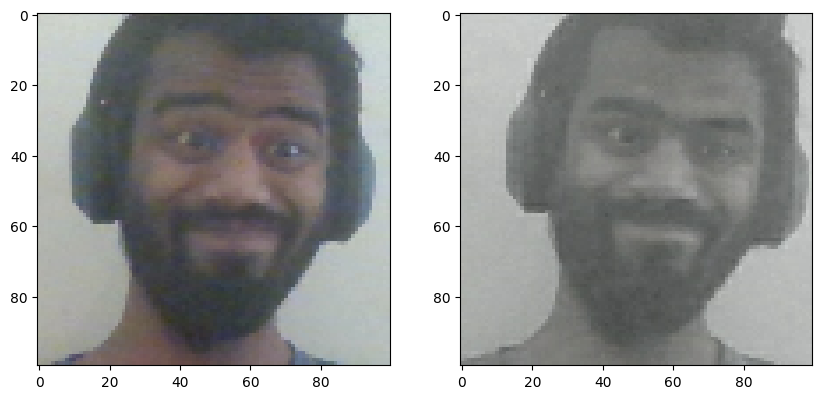

In [140]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

## Save Model

In [141]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

/home/akhilesh/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [142]:
L1Dist

__main__.L1Dist

In [143]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5',custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [144]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 0s 282ms/step


array([[9.9990487e-01],
       [9.9999094e-01],
       [6.3258341e-09],
       [6.8514256e-09]], dtype=float32)

In [145]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Real time test

## verification funnction

In [150]:
# application_data\\verification_images
"application_data\\verification_images"


'application_data\\verification_images'

In [151]:
os.listdir(os.path.join('application_data', 'verification_images'))

['8ba528ad-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52976-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52942-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba528f4-2258-11ee-85ef-617b6042c71f.jpg',
 '56a03de5-21fd-11ee-88e2-895a91a8a222.jpg',
 '5970caa3-21fd-11ee-88e2-895a91a8a222.jpg',
 '8ba52962-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba528d0-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52977-2258-11ee-85ef-617b6042c71f.jpg',
 '56a03de6-21fd-11ee-88e2-895a91a8a222.jpg',
 '8ba52936-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52961-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba528bb-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52956-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52960-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba528e4-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52958-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52978-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52920-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52923-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52927-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba52974-2258-11ee-85ef-617b6042c71f.jpg',
 '8ba528bc

In [152]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data/input_image/input_image.jpg'

In [153]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data/verification_images/8ba528ad-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/8ba52976-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/8ba52942-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/8ba528f4-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/56a03de5-21fd-11ee-88e2-895a91a8a222.jpg
application_data/verification_images/5970caa3-21fd-11ee-88e2-895a91a8a222.jpg
application_data/verification_images/8ba52962-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/8ba528d0-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/8ba52977-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/56a03de6-21fd-11ee-88e2-895a91a8a222.jpg
application_data/verification_images/8ba52936-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/8ba52961-2258-11ee-85ef-617b6042c71f.jpg
application_data/verification_images/8ba528bb-2258-11ee-85ef-617

In [154]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

## OpenCV Real Time Verification

In [155]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 121ms/step
True


In [156]:
np.sum(np.squeeze(results) > 0.9)

30

In [157]:
results

[array([[0.8352929]], dtype=float32),
 array([[0.9136234]], dtype=float32),
 array([[0.90784734]], dtype=float32),
 array([[0.9971059]], dtype=float32),
 array([[0.9965375]], dtype=float32),
 array([[0.99994]], dtype=float32),
 array([[0.96542144]], dtype=float32),
 array([[0.7847376]], dtype=float32),
 array([[0.86326635]], dtype=float32),
 array([[0.99573725]], dtype=float32),
 array([[0.6786421]], dtype=float32),
 array([[0.9892578]], dtype=float32),
 array([[0.89885694]], dtype=float32),
 array([[0.66297287]], dtype=float32),
 array([[0.9967839]], dtype=float32),
 array([[0.7643511]], dtype=float32),
 array([[0.447215]], dtype=float32),
 array([[0.8043033]], dtype=float32),
 array([[0.74467325]], dtype=float32),
 array([[0.88808733]], dtype=float32),
 array([[0.92700946]], dtype=float32),
 array([[0.96585065]], dtype=float32),
 array([[0.90638965]], dtype=float32),
 array([[0.7392233]], dtype=float32),
 array([[0.9999671]], dtype=float32),
 array([[0.9999736]], dtype=float32),
 arr